In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import load_sample_image

In [0]:
china = load_sample_image("china.jpg")

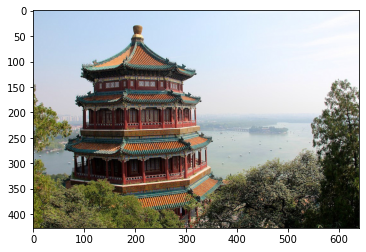

In [20]:
plt.imshow(china/255)

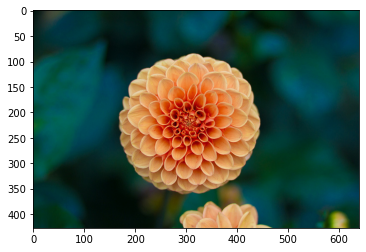

In [21]:
flower = load_sample_image("flower.jpg")
plt.imshow(flower/255)

In [0]:
images = np.array([china/255,flower/255])

In [0]:
batch_size, height, width, channels = images.shape

In [0]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)

In [0]:
filters[:,3,:,0] = 1 #Verticle Line
filters[3,:,:,1] = 1 #Horizontal Line

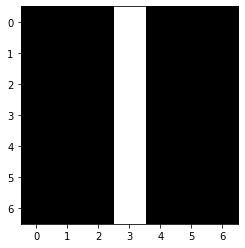

In [30]:
plt.imshow(filters[:,:,:,0])

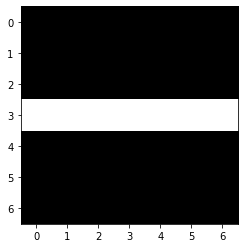

In [31]:
plt.imshow(filters[:,:,:,1])

In [0]:
outputs = tf.nn.conv2d(images,filters,strides=1,padding="SAME")

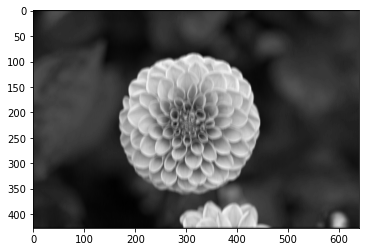

In [33]:
plt.imshow(outputs[1,:,:,0],cmap="gray") #First Feature mape

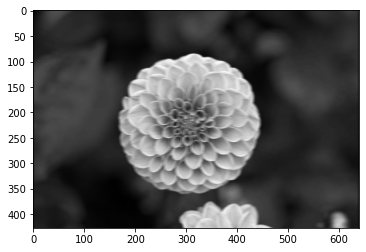

In [35]:
plt.imshow(outputs[1,:,:,1],cmap="gray") #Second Feature map

## Pooling
##### Normal Pooling

In [0]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

### Depth wise Max Pooling

In [0]:
ouput = tf.nn.max_pool2d(
    images,
    ksize=(1,1,1,3),
    strides=(1,1,1,3),
    padding="VALID"
)

In [0]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool2d(X,ksize=(1,1,1,3),strides=(1,1,1,3),padding="VALID")
)

### Global Average Pooling

In [0]:
global_average_pooling = keras.layers.GlobalAvgPool2D()

In [0]:
global_average_pooling = keras.layers.Lambda(
    lambda X: tf.reduce_mean(X,axis = [1,2])
)